In [1]:
import pickle

import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
# " LOAD DATA BASE"
dataset = 'ResponseChatBot.xlsx'
knowledge_base = pd.read_excel(dataset)
knowledge_base.sample(n=20).head(20)

,request,response
52,Quihubo,bien y tu
48,como lo trata la vida,bien ytu
113,bot como te va,Bien y tu
153,hasta luego bot,Ten un buen día
211,dolor de cabeza,Recuerda dormir lo suficiente y beber agua
62,Cuenteme,Te comunico con un asesor
55,Voy bien y tu,me alegro ¿cuentame que necesitas?
37,¿cómo funciona?,Solo debes decirme que necesitas
151,"gracias, hasta luego",Vuelve pronto
47,como va,bien y tu


In [3]:
knowledge_base["response"].unique()

array(['hola', 'buenas', 'buenas  tardes', 'buenas noches', 'Buenos dias',
       'adiós ', 'ten buen día', 'bien y tu', 'estuvo bien y el tuyo ',
       'bye', 'Hola soy bot tu asistente virtual', 'Te leo',
       'Hola soy bot ', 'Solo debes decirme que necesitas',
       'me alegro  ¿cuentame que necesitas?', '¿En que te ayudo?',
       'Te comunico con un asesor', 'bien ytu', 'bieny tu',
       'ten buen dia', 'Vuelve pronto', 'Bien y tu',
       'no entiendo la pregunta', 'Ten un buen día',
       'Recuerda no abrigarte demasiado, tomar liquido y dormir bien',
       'Recuerda dormir lo suficiente y beber agua',
       'No estás sol@, busca a tu amigo o familiar más cercano y acude con un profesional',
       'Si el dolor le impide movimiento ir donde tu medico de familia',
       'podria tratarse de diferente enfermedades  si sientes otros sintomas ve donde tu medico ',
       'Relajate y haz respiraciones sucesivas, no te alteres y consulta tu medico',
       'Recuerda medir tu 

In [4]:
len(knowledge_base)

225

In [5]:
# label encode the target variable to transform non-numerical labels
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(knowledge_base["response"])  # numerical labels
y

array([25, 25, 20, 21, 22,  1, 25, 25, 25, 25, 16, 16, 30, 17, 17, 24, 17,
       17, 23,  3, 12,  2, 10, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,  3,
       12,  2, 17, 10,  3, 12,  2, 17, 10, 31, 11,  3, 17, 17, 18,  3,  3,
       19, 17, 17, 17, 26, 26, 26, 17, 11, 11, 11, 11, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 29, 29, 29, 29, 29, 26, 26, 26,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3, 15, 15, 15, 26,  3,  3,  3,  0,
        3,  0,  0,  0,  3,  3,  3, 27,  0,  0,  0,  0,  3,  3,  3, 14, 15,
       14, 15, 14, 15, 14, 15, 14, 15, 14, 15, 27, 15, 15, 15, 15, 15, 15,
       27, 15, 27, 15, 15, 15, 15, 14, 15, 15, 14, 14, 15, 14, 15, 15, 14,
       14, 15, 14, 15, 14, 15, 15, 15, 14, 15, 27, 15, 14, 15, 27, 15, 15,
       14, 15, 14, 15, 15, 14, 14, 15, 14, 15, 14, 15, 15, 15, 15, 27, 15,
       27, 27, 15, 15, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27,  7,  5,  4,  9, 28,  8,  5,  4,  4,  5,  6,  7,  7,  7, 13, 13,
       13, 13, 13, 13])

In [6]:
intent_names = encoder.classes_
intent_names

array(['Bien y tu', 'Buenos dias', 'Hola soy bot ',
       'Hola soy bot tu asistente virtual',
       'No estás sol@, busca a tu amigo o familiar más cercano y acude con un profesional',
       'Recuerda dormir lo suficiente y beber agua',
       'Recuerda medir tu temperatura,  darte un baño, descansar sihay mas sintomas ir al medico',
       'Recuerda no abrigarte demasiado, tomar liquido y dormir bien',
       'Relajate y haz respiraciones sucesivas, no te alteres y consulta tu medico',
       'Si el dolor le impide movimiento ir donde tu medico de familia',
       'Solo debes decirme que necesitas', 'Te comunico con un asesor',
       'Te leo',
       'Te puede ayudar los masajes, algunos estiramientos y descansar las horas debidas ',
       'Ten un buen día', 'Vuelve pronto', 'adiós ', 'bien y tu',
       'bien ytu', 'bieny tu', 'buenas', 'buenas  tardes',
       'buenas noches', 'bye', 'estuvo bien y el tuyo ', 'hola',
       'me alegro  ¿cuentame que necesitas?', 'no entiendo l

In [7]:
x = knowledge_base["request"]
x

0                     hola
1                       hi
2                   buenas
3            buenas tardes
4            buenas noches
              ...         
220       Me duele la mano
221      Me duele el brazo
222        Me duele el pie
223     Me duele la pierna
224    Me duele la espalda
Name: request, Length: 225, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
# Hold-out Partition
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)

# PROCESAMIENTO

## ....

In [9]:
" TF-IDF score represents the relative importance of a term in the document and the entire corpus. "
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
x_train_tfidf = tfidf_vect.transform(X_train)
x_train_tfidf

<168x145 sparse matrix of type '<class 'numpy.float64'>'
	with 359 stored elements in Compressed Sparse Row format>

In [10]:
tfidf_vect.get_feature_names_out()

array(['abdominal', 'adios', 'ah', 'aja', 'alta', 'asi', 'ayuda', 'bien',
       'biencito', 'bot', 'brazo', 'buenas', 'bueno', 'bye', 'cabeza',
       'cancela', 'cancelar', 'capito', 'chao', 'chaolin', 'chau',
       'chauuu', 'color', 'como', 'conversación', 'creo', 'cuentame',
       'cuenteme', 'cuerpo', 'cómo', 'de', 'debo', 'deseo', 'dia', 'dias',
       'dime', 'doki', 'dolor', 'dsd', 'duele', 'día', 'el', 'en',
       'encuentro', 'entendido', 'entendí', 'eres', 'espalda', 'esta',
       'estas', 'este', 'estoy', 'estubo', 'estuvo', 'estás', 'estés',
       'ey', 'favorito', 'fdfgghfdgfdgdg', 'feliz', 'fiebre', 'funciona',
       'gracias', 'hablamos', 'hablar', 'haces', 'hasta', 'hello', 'helo',
       'hi', 'hola', 'holita', 'hubo', 'igual', 'info', 'irme', 'jelo',
       'la', 'llamas', 'lo', 'localizado', 'luego', 'mano', 'me', 'mi',
       'muchas', 'muy', 'nada', 'nausea', 'necesito', 'no', 'noches',
       'nos', 'ok', 'oka', 'oki', 'ola', 'olita', 'perfecto', 'pie',
  

In [11]:
" MODEL TRAINING AND DEVELOPMENT"
nfolds = 5
tuned_parameters = {'C': [0.001, 0.10, 0.1, 10, 100, 1000]}
lr_model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=nfolds,  scoring='accuracy') 
lr_model.fit(x_train_tfidf, y_train)

/home/esneider/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/esneider/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/esneider/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 100, 1000]},
             scoring='accuracy')

In [12]:
means = lr_model.cv_results_['mean_test_score']
stds = lr_model.cv_results_['std_test_score']
parameters = lr_model.cv_results_['params']
results = pd.concat((pd.DataFrame.from_dict(parameters), pd.DataFrame(means, columns=['Mean']), pd.DataFrame(stds, columns=['STD'])), axis=1)
results

,C,Mean,STD
0,0.001,0.196435,0.014400
1,0.100,0.196435,0.014400
2,0.100,0.196435,0.014400
3,10.000,0.488057,0.077489
4,100.000,0.469875,0.095557
5,1000.000,0.463993,0.088753


In [13]:
best_c = lr_model.cv_results_['params'][lr_model.best_index_]['C']
best_c

10

In [14]:
# TEST & METRICS & ERROR ANALYSIS

best_lr_model = LogisticRegression(C=best_c).fit(x_train_tfidf, y_train)

In [15]:
X_test.head()

111          bot como te ha ido
101                 bot que tal
197                      altura
183    salir de la conversación
75               muchas gracias
Name: request, dtype: object

In [16]:
# PROCESAMIENTO DEL CONJUNTO DE TEST

In [17]:
x_test_tfidf = tfidf_vect.transform(X_test)
x_test_tfidf

<57x145 sparse matrix of type '<class 'numpy.float64'>'
	with 112 stored elements in Compressed Sparse Row format>

In [18]:
y_pred = best_lr_model.predict(x_test_tfidf)

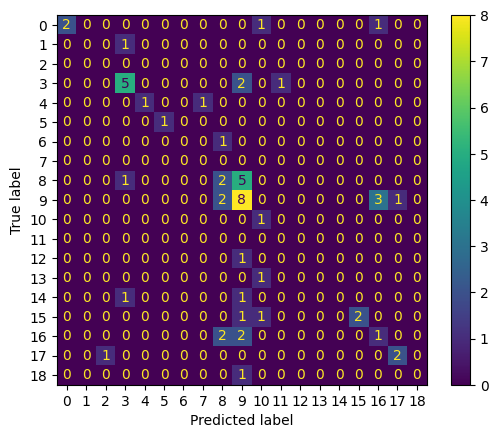

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.62      0.62      0.62         8
           4       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.29      0.25      0.27         8
          15       0.38      0.57      0.46        14
          17       0.25      1.00      0.40         1
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         2
          26       1.00      0.50      0.67         4
          27       0.20      0.20      0.20         5
          29       0.67    

/home/esneider/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/esneider/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/esneider/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/esneider/.local/lib/python3.8/site-p

In [21]:
# TRAIN MODEL WITH ALL DATA FOR PRODUCTION
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(x)
x_tfidf = tfidf_vect.transform(x)

pdn_lr_model = LogisticRegression(C=best_c).fit(x_tfidf, y)

In [22]:
pdn_lr_model

LogisticRegression(C=10)

In [23]:
# "SAVE FINAL MODEL"
pickle.dump(pdn_lr_model, open('model_chatbot.pkl', 'wb'))
pickle.dump(tfidf_vect, open('chatbot_vocabulary.pkl', 'wb'))
pickle.dump(intent_names, open('response_chatbot.pkl', 'wb'))